<a href="https://colab.research.google.com/github/satty0104/machine-learning/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Support Vector Classifier

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# create synthetic data poinnts
from sklearn.datasets import make_classification

In [ ]:
x, y = make_classification(n_samples=1000, n_features= 2, n_classes=2, n_clusters_per_class=2, n_redundant=0)

In [ ]:
x

array([[ 0.45981853, -0.74520137],
       [ 1.89452022, -3.3411362 ],
       [ 1.02601108,  1.1612865 ],
       ...,
       [-1.44222605,  0.66539552],
       [-0.63061832,  0.65318149],
       [ 2.72125544, -0.53640512]])

In [ ]:
# prompt: display y

y


array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,

In [ ]:

df = pd.DataFrame(x)[0]


<Axes: xlabel='0', ylabel='1'>

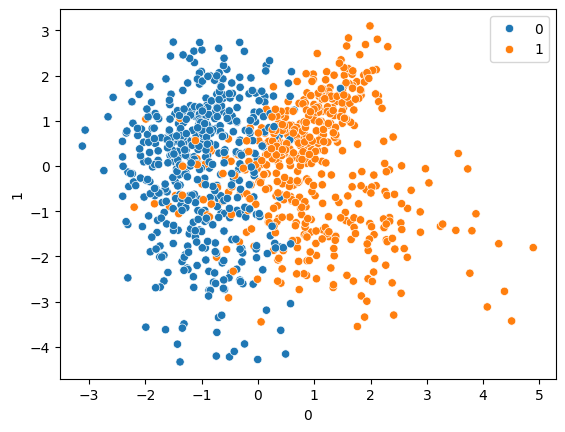

In [ ]:
sns.scatterplot(x= pd.DataFrame(x)[0], y= pd.DataFrame(x)[1], hue=y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:

from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='linear')

In [ ]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred= svc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       135
           1       0.91      0.87      0.89       115

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[125  10]
 [ 15 100]]
0.9


Hperparameter tuning with svc

In [ ]:
from sklearn.model_selection import GridSearchCV

#parameter range
param_grid ={'C' : [0.1, 1, 10, 100, 1000],
             'gamma' :[1, 0.1, 0.01, 0.001, 0.0001],
}

In [ ]:
gridsearch = GridSearchCV(SVC(), param_grid=param_grid, refit=True, cv =5, verbose=3)

In [ ]:
gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.887 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.933 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.907 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.920 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.907 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.887 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.927 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.893 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.927 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.887 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.880 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [ ]:
y_pred2 = gridsearch.predict(x_test)

In [ ]:
cr = classification_report(y_test, y_pred2)
cm = confusion_matrix(y_test, y_pred2)
ac = accuracy_score(y_test, y_pred2)



In [ ]:
cr

'              precision    recall  f1-score   support\n\n           0       0.88      0.95      0.91       135\n           1       0.93      0.84      0.89       115\n\n    accuracy                           0.90       250\n   macro avg       0.90      0.90      0.90       250\nweighted avg       0.90      0.90      0.90       250\n'

In [ ]:
cm

array([[128,   7],
       [ 18,  97]])

In [ ]:
ac

0.9

**Support vector regression**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
 from sklearn.datasets import make_regression

In [ ]:
x, y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)

In [ ]:
pd.DataFrame(x)[0]

0      0.391566
1      0.279578
2      1.055879
3      1.031812
4      0.265697
         ...   
995    0.676728
996   -0.100591
997    1.504436
998   -0.810277
999   -1.970981
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

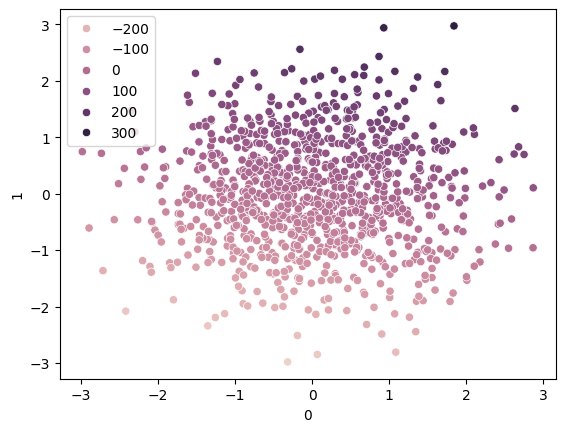

In [ ]:
sns.scatterplot(x= pd.DataFrame(x)[0], y= pd.DataFrame(x)[1], hue =y)

In [ ]:
x_train, y_train, x_test, y_test= train_test_split(x, y, random_state=42, test_size=0.25 )

In [ ]:
 from sklearn.svm import SVR

In [ ]:
svr = SVR(kernel='linear')

In [ ]:
svr.fit(x_train,y_train)

ValueError: y should be a 1d array, got an array of shape (250, 2) instead.

SVR(kernel='linear')

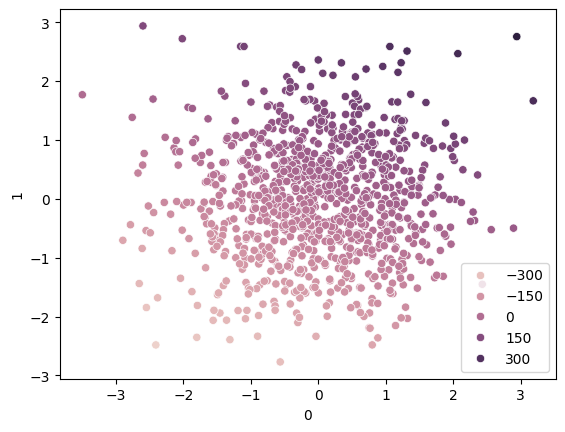

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate synthetic data
x, y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)

# Visualize the data
sns.scatterplot(x=pd.DataFrame(x)[0], y=pd.DataFrame(x)[1], hue=y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)

# Import and train the Support Vector Regression (SVR) model
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(x_train, y_train)

In [ ]:
y_pred =svr.predict(x_test)

In [ ]:
y_pred

array([ -55.1853498 ,  -52.98281417,   69.96139476,  -59.48508684,
          5.09333966,    9.15324137,  119.51755941,  145.71820915,
         17.82651633, -165.92101691,   34.68468491,   94.38018999,
        -33.43686603,   11.08473832,  -47.68141781,   53.27295969,
        -14.4899329 ,  -48.93641258,    7.23400629,  119.23054145,
        152.87205109,   74.08799596, -105.91983365, -162.26849633,
        -38.7850959 ,   37.35247697,   88.60432092,  -27.32250305,
         12.12168007, -106.51796174,  124.61142268,   95.00450151,
        202.9082975 , -145.81623109,   33.1424046 ,  -10.41066478,
        -41.47222368,   57.61390787,  -94.6213511 ,  -57.32935144,
         27.36972465,  -56.18151849, -150.88501588,  -32.96214083,
        -88.11978637,   21.19768692,  114.79575303,  188.35230552,
        -29.75063985, -163.84975515,  -63.01746026,  -99.97203389,
       -107.71383779,   -1.34739768, -297.51791719, -119.57962808,
        -54.0799734 ,    1.0826625 ,  -28.57545252, -130.96744

In [ ]:
from sklearn.metrics import r2_score
rs = r2_score(y_test, y_pred)

In [ ]:
rs

0.9992138685899772

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'C' : [0.1, 1, 10, 100, 1000],
              'gamma' : [1, 0.1, 0.001, 0.001, 0.0001],
               'kernel' : ['linear' ],
              'epsilon' : [0.1,0.2, 0.3] }

In [ ]:
grid = GridSearchCV(SVR(), param_grid=param_grid, refit=True, cv=5, verbose=3 )

In [ ]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.666 total time=   0.1s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.665 total time=   0.1s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.669 total time=   0.1s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.671 total time=   0.1s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.667 total time=   0.1s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.666 total time=   0.1s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.665 total time=   0.1s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.669 total time=   0.1s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.671 total time=   0.1s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.667 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.001, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [ ]:
y_pred2 = grid.predict(x_test)
print(r2_score(y_test, y_pred2))

0.9992469859691087


### **SVM Kernel Implementation **

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x= np.linspace(-5.0, 5.0, 100)
y= np.sqrt(10**2 - x**2)
y= np.hstack([y, -y])
x= np.hstack([x, -x])

In [ ]:
x1= np.linspace(-5.0, 5.0, 100)
y1= np.sqrt(5**2 - x1**2)
y1= np.hstack([y1, -y1])
x1= np.hstack([x1, -x1])

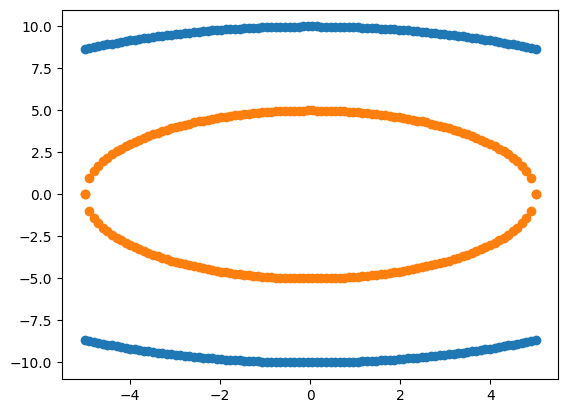

In [ ]:
plt.scatter(x, y)
plt.scatter(x1, y1)

In [ ]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y, x]).T, columns = ['X1', 'X2'])
df1['Y']=0
df2= pd.DataFrame(np.vstack([y1, x1]).T, columns = ['X1', 'X2'])
df2['Y']=1
df= df1.append(df2)
df.head(5)


<ipython-input-11-2718b9d9c5f3>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df1.append(df2)


,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['X1'].plot(kind='hist', bins=20, title='X1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['X2'].plot(kind='hist', bins=20, title='X2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='X1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='X1', y='X2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['X1']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'X1'}, axis=1)
              .sort_values('X1', ascending=True))
  xs = counted['X1']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('X1', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('X1')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['X2']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'X2'}, axis=1)
              .sort_values('X2', ascending=True))
  xs = counted['X2']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('X2', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('X2')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Y']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Y'}, axis=1)
              .sort_values('Y', ascending=True))
  xs = counted['Y']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Y', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Y')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['X1'].plot(kind='line', figsize=(8, 4), title='X1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['X2'].plot(kind='line', figsize=(8, 4), title='X2')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# k(x, y) = (x^Ty +c)^d
#polynomial kernel

In [ ]:
df['X1_square'] = df['X1']**2
df['X2_square']=df['X2']**2
df['X1*X2']= df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_square,X2_square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


from matplotlib import pyplot as plt
_df_12['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['X1'].plot(kind='hist', bins=20, title='X1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['X2'].plot(kind='hist', bins=20, title='X2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['X1_square'].plot(kind='hist', bins=20, title='X1_square')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='index', y='X1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='X1', y='X2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='X2', y='X1_square', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='X1_square', y='X2_square', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['X2_square']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('X2_square')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['X1']
  ys = series['X2_square']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('X1', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('X1')
_ = plt.ylabel('X2_square')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['X1']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'X1'}, axis=1)
              .sort_values('X1', ascending=True))
  xs = counted['X1']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('X1', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('X1')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_24['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['X1'].plot(kind='line', figsize=(8, 4), title='X1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['X2'].plot(kind='line', figsize=(8, 4), title='X2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['X1_square'].plot(kind='line', figsize=(8, 4), title='X1_square')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
x = df[['X1_square', 'X2_square', 'X1*X2']]
y = df['Y']

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.25, random_state=0)

In [ ]:
%matplotlib inline

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='X1_square', y='X2_square', z ='X1*X2', color = 'Y')

fig.show()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

# New Section